# Log Dataset as Weights and Biases Artifact

In [ ]:
import wandb
import numpy as np
import os
from sklearn.model_selection import train_test_split

In [ ]:
from pythonScript.modules.data_preprocessing import load_images_from_folder, ImageType

In [ ]:
PATH_WITH_SIGN = os.path.join(".", "data", "y")
PATH_WITHOUT_SIGN = os.path.join(".", "data", "n")
IMAGE_SIZE = (250, 250)

## Normal

In [ ]:
images_with_sign, labels_with_sign = load_images_from_folder(
    PATH_WITH_SIGN, 1, IMAGE_SIZE, ImageType.ORIGINAL
)

In [ ]:
images_without_sign, labels_without_sign = load_images_from_folder(
    PATH_WITHOUT_SIGN, 0, IMAGE_SIZE, ImageType.ORIGINAL
)

In [ ]:
all_images = np.concatenate((images_with_sign, images_without_sign), axis=0) / 255.0
all_labels = np.concatenate((labels_with_sign, labels_without_sign), axis=0)

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42
)
train_images, validation_images, train_labels, validation_labels = (
    train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
with wandb.init(project="VisionTransformer", job_type="load-data") as run:
    raw_data = wandb.Artifact(
        "swissimage-10cm-no-preprocessing", type="dataset", metadata={"source": "Swissimage 10cm", "size": len(all_images)}
        )

    # Training
    with raw_data.new_file("training-no-preprocessing.npy", mode="wb") as fh:
        np.savez_compressed(fh, images=train_images, labels=train_labels)

    # Validation
    with raw_data.new_file("validation-no-preprocessing.npy", mode="wb") as fh:
        np.savez_compressed(fh, images=validation_images, labels=validation_labels)

    # Test
    with raw_data.new_file("test-no-preprocessing.npy", mode="wb") as fh:
        np.savez_compressed(fh, images=test_images, labels=test_labels)

    run.log_artifact(raw_data)


## Preprocessed

In [ ]:
images_with_sign_canny, labels_with_sign_canny = load_images_from_folder(
    PATH_WITH_SIGN, 0, IMAGE_SIZE, img_type=ImageType.CANNY
)
images_without_sign_canny, labels_without_sign_canny = load_images_from_folder(
    PATH_WITHOUT_SIGN, 1, IMAGE_SIZE, img_type=ImageType.CANNY
)

In [ ]:
images_with_sign_morphology, labels_with_sign_morphology = load_images_from_folder(
    PATH_WITH_SIGN, 0, IMAGE_SIZE, img_type=ImageType.MORPHOLOGY
)
images_without_sign_morphology, labels_without_sign_morphology = (
    load_images_from_folder(
        PATH_WITHOUT_SIGN, 1, IMAGE_SIZE, img_type=ImageType.MORPHOLOGY
    )
)

In [ ]:
images_with_sign_normal, labels_with_sign_normal = load_images_from_folder(
    PATH_WITH_SIGN, 0, IMAGE_SIZE, img_type=ImageType.NORMAL
)
images_without_sign_normal, labels_without_sign_normal = load_images_from_folder(
    PATH_WITHOUT_SIGN, 1, IMAGE_SIZE, img_type=ImageType.NORMAL
)

In [ ]:
images_with_sign = np.concatenate(
    (images_with_sign_canny, images_with_sign_morphology, images_with_sign_normal),
    axis=-1,
)
images_without_sign = np.concatenate(
    (
        images_without_sign_canny,
        images_without_sign_morphology,
        images_without_sign_normal,
    ),
    axis=-1,
)

In [ ]:
labels_with_sign = np.array(labels_with_sign_canny)
labels_without_sign = np.array(labels_without_sign_canny)

In [ ]:
all_images = np.concatenate((images_with_sign, images_without_sign), axis=0)
all_labels = np.concatenate((labels_with_sign, labels_without_sign), axis=0)
all_images = all_images.astype("float32") / 255.0

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42
)
train_images, validation_images, train_labels, validation_labels = (
    train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
)

In [ ]:
with wandb.init(project="VisionTransformer", job_type="load-data") as run:
    raw_data = wandb.Artifact(
        "swissimage-10cm-preprocessing", type="dataset", metadata={"source": "Swissimage 10cm", "size": len(all_images)}
        )

    # Training
    with raw_data.new_file("training-preprocessing.npy", mode="wb") as fh:
        np.savez_compressed(fh, images=train_images, labels=train_labels)

    # Validation
    with raw_data.new_file("validation-preprocessing.npy", mode="wb") as fh:
        np.savez_compressed(fh, images=validation_images, labels=validation_labels)

    # Test
    with raw_data.new_file("test-preprocessing.npy", mode="wb") as fh:
        np.savez_compressed(fh, images=test_images, labels=test_labels)

    run.log_artifact(raw_data)

# Load

In [ ]:
with wandb.init(project="VisionTransformer") as run:
    artifact = run.use_artifact('silvan-wiedmer-fhgr/VisionTransformer/swissimage-10cm-no-preprocessing:v0', type='dataset')
    artifact_dir = artifact.download()

wandb: Downloading large artifact swissimage-10cm-no-preprocessing:v0, 310.23MB. 3 files... 
wandb:   3 of 3 files downloaded.  
Done. 0:0:26.3


/Users/silvanwiedmer/Desktop/VisionTransformer/artifacts/swissimage-10cm-no-preprocessing:v0


In [19]:
loaded = np.load("artifacts/swissimage-10cm-no-preprocessing:v0/test-no-preprocessing.npy")

In [20]:
loaded

NpzFile 'artifacts/swissimage-10cm-no-preprocessing:v0/test-no-preprocessing.npy' with keys: images, labels

In [26]:
loaded["labels"][0]

np.int64(1)

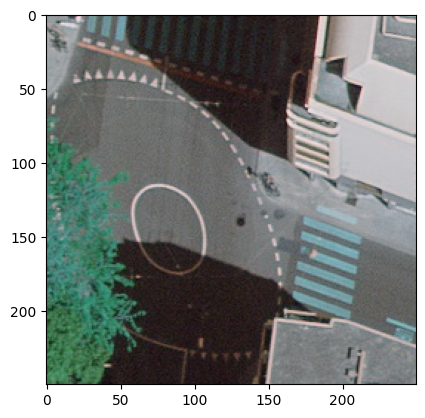

In [24]:
plt.imshow(loaded["images"][0])